C:\Users\Armin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


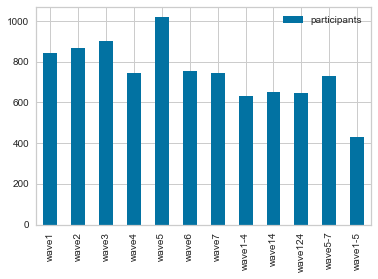

In [1]:
#Steps 1-3

import numpy as np
import pandas as pd
import datetime
import pandas_profiling as pp
from IPython.display import display, HTML
import pymannkendall as mk
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from itertools import combinations
import itertools
from statsmodels.stats.outliers_influence import variance_inflation_factor
import ipynb.fs.full.script

%matplotlib inline
pd.options.display.max_columns = None

pd.options.display.max_rows = 10
pd.options.display.width = 200
np.set_printoptions(precision = 4, suppress = True) 

legit_classes1 = [67,71,72,74,77,78,79,81,83,86,100,101,103,121,122,125,126,127,129,130,131,133,135,138]
legit_classes2 = [73,74,78,81,82,86,100,103,124,125,131,133,135,141,250,251,256,258,259,261,262,263,272,273,277,279,290,291,292,296,297,298,299,300,301,302,303,304,305,306,307,308,310]
participants = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/8. Metadata/Participant_Info.csv", sep= ';')

par_w1 = participants["W1"] == 1
par_w2 = participants["W2"] == 1
par_w3 = participants["W3"] == 1
par_w4 = participants["W4"] == 1
par_w5 = participants["W5"] == 1
par_w6 = participants["W6"] == 1
par_w7 = participants["W7"] == 1

total1 = len(participants[par_w1])
total2 = len(participants[par_w3])
total3 = len(participants[par_w2])
total4 = len(participants[par_w4])
total5 = len(participants[par_w5])
total6 = len(participants[par_w6])
total7 = len(participants[par_w7])
total1_4 = len(participants[par_w1 & par_w2 & par_w3 & par_w4])
total14 = len(participants[par_w1 & par_w4])
total124 = len(participants[par_w1 & par_w2 & par_w4])
total5_7 = len(participants[par_w5 & par_w6 & par_w7])
total1_5 = len(participants[par_w1 & par_w2 & par_w3 & par_w4 & par_w5])

par_per_wave = pd.DataFrame({
    'participants': [total1, total2, total3, total4, total5, total6, total7, total1_4, total14, total124, total5_7, total1_5]}, index=['wave1', 'wave2', 'wave3', 'wave4', 'wave5', 'wave6', 'wave7', 'wave1-4', 'wave14','wave124', 'wave5-7', 'wave1-5'])

par_per_wave.plot.bar()


#display(participants[par_w1 & par_w2 & par_w3 & par_w4 & par_w5 & par_w6 & par_w7])
#print(participants[par_w1 & par_w2 & par_w3 & par_w4].count)


In [2]:
#getting participants from 1 to 3
participants1_3 = participants[['Child','Class_Y1']][par_w1 & par_w2 & par_w3]
participants1_3 = participants1_3[participants1_3["Class_Y1"].isin(legit_classes1)]
par_13 = participants1_3
participants1_3 = participants1_3["Child"].tolist()
schools = participants['School'][participants['Child'].isin(participants1_3)].unique().tolist()
display(schools)

[25, 26, 27, 29, 28, 30, 32, 33, 34, 37, 39, 42, 40]

In [3]:
#fit
#compare waves with eachother as percentage for example
fit_clean = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/5. Fitbit data/Fitbit_W17_cleaned_imputation.csv", sep= ';')
fit_clean1_3 = fit_clean[fit_clean["Child"].isin(participants1_3)]

fit_clean1_3 = fit_clean1_3[fit_clean1_3["Wave"] <= 3]

fit_clean1_3['Date'] = pd.to_datetime(fit_clean1_3['Date'])

fit_clean1_3['Weekend'] = fit_clean1_3['Date'].dt.day_name()
fit_clean1_3['Weekend'].loc[(fit_clean1_3['Weekend'].isin(['Saturday', 'Sunday']))] = 0
fit_clean1_3['Weekend'].loc[(fit_clean1_3['Weekend'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))] = 1

fit_clean1_3 = fit_clean1_3.drop(columns = ['Imputed','Participated'])
fit_clean1_3 = fit_clean1_3.sort_values(['Child','Wave', 'Day'])
display(fit_clean1_3[fit_clean1_3['Child'] == 1222])

C:\Users\Armin\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,School,Class,Child,Sex,Age,Wave,Day,Date,Steps,Minutes_MVPA,Weekend
1726,25,67,1222,1,11.0,1,1,2016-01-28,12620.0,0.0,1
1727,25,67,1222,1,11.0,1,2,2016-01-29,4601.0,0.0,1
1728,25,67,1222,1,11.0,1,3,2016-01-30,3498.0,0.0,0
1729,25,67,1222,1,12.0,2,1,2016-03-31,7554.0,17.0,1
1730,25,67,1222,1,12.0,2,2,2016-01-04,6924.0,13.0,1
1731,25,67,1222,1,12.0,2,3,2016-02-04,3665.0,0.0,1
1734,25,67,1222,1,12.0,3,1,2016-01-06,8011.0,10.0,1
1733,25,67,1222,1,12.0,3,2,2016-02-06,1702.0,0.0,0
1732,25,67,1222,1,12.0,3,3,2016-03-06,2845.0,0.0,0


,Child,Wave,School,Class,Steps,Sex,Age,Weekend_steps,Week_steps,MVPA,Weekend_MVPA,Week_MVPA
0,1222,1,25,67,6906.333333,1,11.0,3498.0,8610.500000,0.000000,0.000000,0.000000
1,1222,2,25,67,6047.666667,1,12.0,NaN,6047.666667,10.000000,NaN,10.000000
2,1222,3,25,67,4186.000000,1,12.0,2273.5,8011.000000,3.333333,0.000000,10.000000
3,1224,1,25,67,6971.000000,1,12.0,7248.0,6555.500000,22.000000,24.333333,18.500000
4,1224,2,25,67,9913.600000,1,12.0,NaN,9913.600000,20.000000,NaN,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1075,3191,2,40,135,10548.250000,1,9.0,10799.0,10297.500000,44.250000,40.000000,48.500000
1076,3191,3,40,135,8701.000000,1,10.0,12417.0,6843.000000,54.666667,111.000000,26.500000
1077,3192,1,40,135,10895.750000,0,10.0,10097.0,11162.000000,50.500000,31.000000,57.000000
1078,3192,2,40,135,10053.250000,0,10.0,5043.0,11723.333333,43.250000,0.000000,57.666667


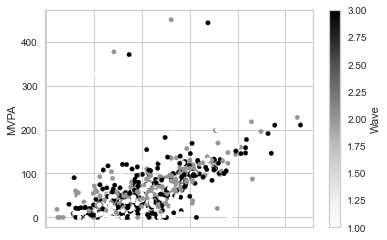

In [4]:
# getting fitbit data and splitting it in weekdays and weekend days for wave 1-3
avg_steps_13 = fit_clean1_3[['School', 'Class', 'Child', 'Wave', 'Weekend','Steps', 'Sex', 'Age']].copy()
avg_mvpa_13 = fit_clean1_3[['School', 'Class', 'Child', 'Wave', 'Weekend', 'Minutes_MVPA', 'Sex', 'Age']].copy()

temp = avg_steps_13.groupby(['Child','Wave', 'Weekend']).mean()
temp = temp.reset_index()
weekend_days = temp[['Child', 'Wave','Steps']][temp['Weekend'] == 0]
week_days = temp[['Child', 'Wave','Steps']][temp['Weekend'] == 1]
weekend_days.columns = ['Child', 'Wave', 'Weekend_steps']
week_days.columns = ['Child', 'Wave', 'Week_steps']

avg_steps_13 = avg_steps_13.groupby(['Child', 'Wave']).mean()
avg_steps_13.columns = ['School', 'Class', 'Steps', 'Sex', 'Age']
avg_steps_13 = avg_steps_13.reset_index()
avg_steps_13 = avg_steps_13.merge(weekend_days, how = 'left')
avg_steps_13 = avg_steps_13.merge(week_days, how = 'left')

temp = avg_mvpa_13.groupby(['Child','Wave', 'Weekend']).mean()
temp = temp.reset_index()
weekend_mvpa = temp[['Child', 'Wave','Minutes_MVPA']][temp['Weekend'] == 0]
week_mvpa = temp[['Child', 'Wave','Minutes_MVPA']][temp['Weekend'] == 1]
weekend_mvpa.columns = ['Child', 'Wave', 'Weekend_MVPA']
week_mvpa.columns = ['Child', 'Wave', 'Week_MVPA']

avg_mvpa_13 = avg_mvpa_13.groupby(['Child', 'Wave']).mean()
avg_mvpa_13.columns = ['School', 'Class', 'MVPA', 'Sex', 'Age']
avg_mvpa_13 = avg_mvpa_13.reset_index()
avg_mvpa_13 = avg_mvpa_13.merge(weekend_mvpa, how = 'left')
avg_mvpa_13 = avg_mvpa_13.merge(week_mvpa, how = 'left')

full_table_13 = avg_steps_13.merge(avg_mvpa_13)

display(full_table_13)
full_table_13.plot.scatter(x = 'Steps', y = 'MVPA', c = 'Wave')

In [5]:
#getting the overall trend (so postive, no trend or negative) and getting the trend line (slope) 
new_table = fit_clean1_3
new_table = new_table.drop(['Wave', 'Minutes_MVPA', 'Weekend'], axis = 1)
new_table["Trend"] = np.nan

In [6]:
for index, row in new_table.iterrows():
    temp = mk.original_test(new_table[new_table['Child'] == row['Child']]['Steps'], alpha=0.05).slope
    overall = mk.original_test(new_table[new_table['Child'] == row['Child']]['Steps'], alpha=0.05).trend
    new_table.loc[new_table['Child'] == row['Child'], 'Trend'] = temp
    new_table.loc[new_table['Child'] == row['Child'], 'Overall_Trend'] = overall    

In [7]:
temp = new_table[['Child', 'Trend','Overall_Trend']].drop_duplicates()
full_table_13 = full_table_13.merge(temp)
full_table_13
fit_clean1_3


,School,Class,Child,Sex,Age,Wave,Day,Date,Steps,Minutes_MVPA,Weekend
1726,25,67,1222,1,11.0,1,1,2016-01-28,12620.0,0.0,1
1727,25,67,1222,1,11.0,1,2,2016-01-29,4601.0,0.0,1
1728,25,67,1222,1,11.0,1,3,2016-01-30,3498.0,0.0,0
1729,25,67,1222,1,12.0,2,1,2016-03-31,7554.0,17.0,1
1730,25,67,1222,1,12.0,2,2,2016-01-04,6924.0,13.0,1
...,...,...,...,...,...,...,...,...,...,...,...
18299,40,135,3192,0,10.0,2,3,2016-04-16,5043.0,0.0,0
18301,40,135,3192,0,10.0,2,5,2016-04-18,13237.0,83.0,1
18303,40,135,3192,0,10.0,3,1,2016-10-06,30175.0,208.0,1
18305,40,135,3192,0,10.0,3,2,2016-11-06,9264.0,125.0,0


In [8]:
# getting the class trend (mean of class)
temp = full_table_13[['Child', 'Class', 'Trend']].drop_duplicates()
temp = temp[['Class', 'Trend']]
temp = temp.groupby('Class').mean()
temp.columns = ['Class_Trend']
temp = temp.reset_index()
full_table_13 = full_table_13.merge(temp)

Mann_Kendall_Test(trend='no trend', h=False, p=0.14986074751304912, z=1.4400235107798574, Tau=0.3333333333333333, s=22.0, var_s=212.66666666666666, slope=411.5625, intercept=8728.90625)

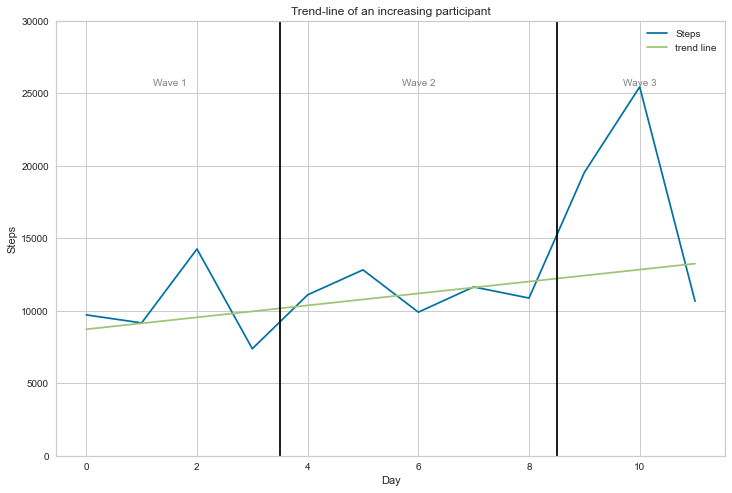

In [9]:
# plot of this participant including all labels etc
iets = fit_clean1_3[fit_clean1_3['Child'] == 3190]['Steps'].reset_index()
iets = iets['Steps']

fig, ax = plt.subplots(figsize=(12, 8))
res = mk.original_test(iets)
trend_line = np.arange(len(iets)) * res.slope + res.intercept

ax.plot(iets)
ax.set_ylim([0,30000])
ax.plot(iets.index, trend_line)
ax.legend(['Steps', 'trend line'])
plt.title('Trend-line of an increasing participant')
plt.xlabel('Day')
plt.ylabel('Steps')
plt.axvline(x = 3.5, color='black')
plt.axvline(x = 8.5, color='black')
style = dict(size=10, color='gray')
ax.text(1.5, 25500, "Wave 1", ha='center',**style)
ax.text(6, 25500, "Wave 2", ha='center',**style)
ax.text(10, 25500, "Wave 3", ha='center',**style)

temp = mk.original_test(iets, alpha=0.05)
temp

Mann_Kendall_Test(trend='increasing', h=True, p=0.037497490815719736, z=2.080305825515164, Tau=0.42857142857142855, s=39.0, var_s=333.6666666666667, slope=326.8, intercept=7243.799999999999)

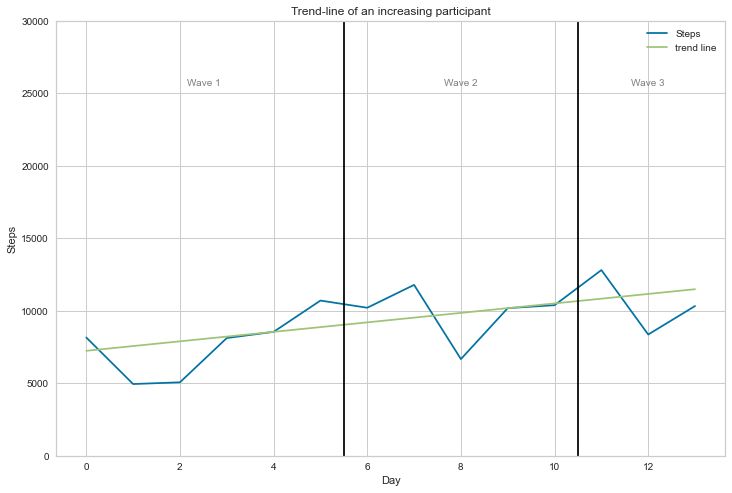

In [10]:
iets = fit_clean1_3[fit_clean1_3['Child'] == 1224]['Steps'].reset_index()
iets = iets['Steps']

fig, ax = plt.subplots(figsize=(12, 8))
res = mk.original_test(iets)
trend_line = np.arange(len(iets)) * res.slope + res.intercept

ax.plot(iets)
ax.set_ylim([0,30000])
ax.plot(iets.index, trend_line)
ax.legend(['Steps', 'trend line'])
plt.title('Trend-line of an increasing participant')
plt.xlabel('Day')
plt.ylabel('Steps')
plt.axvline(x = 5.5, color='black')
plt.axvline(x = 10.5, color='black')
style = dict(size=10, color='gray')
ax.text(2.5, 25500, "Wave 1", ha='center',**style)
ax.text(8, 25500, "Wave 2", ha='center',**style)
ax.text(12, 25500, "Wave 3", ha='center',**style)

temp = mk.original_test(iets, alpha=0.05)
temp

Mann_Kendall_Test(trend='no trend', h=False, p=0.07633274037635718, z=-1.7723725194851356, Tau=-0.5, s=-18.0, var_s=92.0, slope=-523.5833333333333, intercept=6571.333333333333)

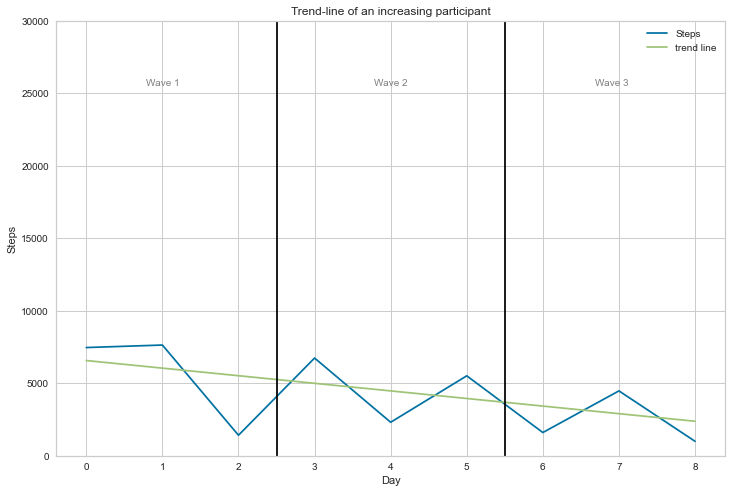

In [11]:
iets = fit_clean1_3[fit_clean1_3['Child'] == 1232]['Steps'].reset_index()
iets = iets['Steps']

fig, ax = plt.subplots(figsize=(12, 8))
res = mk.original_test(iets)
trend_line = np.arange(len(iets)) * res.slope + res.intercept

ax.plot(iets)
ax.set_ylim([0,30000])
ax.plot(iets.index, trend_line)
ax.legend(['Steps', 'trend line'])
plt.title('Trend-line of an increasing participant')
plt.xlabel('Day')
plt.ylabel('Steps')
plt.axvline(x = 2.5, color='black')
plt.axvline(x = 5.5, color='black')
style = dict(size=10, color='gray')
ax.text(1, 25500, "Wave 1", ha='center',**style)
ax.text(4, 25500, "Wave 2", ha='center',**style)
ax.text(6.9, 25500, "Wave 3", ha='center',**style)

temp = mk.original_test(iets, alpha=0.05)
temp

Mann_Kendall_Test(trend='no trend', h=False, p=1.0, z=0.0, Tau=-0.01818181818181818, s=-1.0, var_s=165.0, slope=-4.222222222222222, intercept=10583.111111111111)

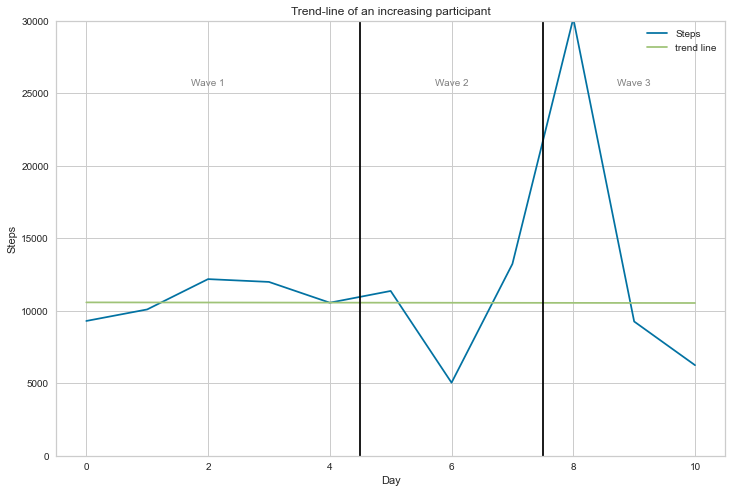

In [12]:
iets = fit_clean1_3[fit_clean1_3['Child'] == 3192]['Steps'].reset_index()
iets = iets['Steps']

fig, ax = plt.subplots(figsize=(12, 8))
res = mk.original_test(iets)
trend_line = np.arange(len(iets)) * res.slope + res.intercept

ax.plot(iets)
ax.set_ylim([0,30000])
ax.plot(iets.index, trend_line)
ax.legend(['Steps', 'trend line'])
plt.title('Trend-line of an increasing participant')
plt.xlabel('Day')
plt.ylabel('Steps')
plt.axvline(x = 4.5, color='black')
plt.axvline(x = 7.5, color='black')
style = dict(size=10, color='gray')
ax.text(2, 25500, "Wave 1", ha='center',**style)
ax.text(6, 25500, "Wave 2", ha='center',**style)
ax.text(9, 25500, "Wave 3", ha='center',**style)

temp = mk.original_test(iets, alpha=0.05)
temp

In [13]:
#socio
socio_gbl_123 = pd.read_excel("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/social_networks_global_waves123.xlsx", sep= ';')
socio_gbl_567 = pd.read_excel("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/social_networks_global_waves567.xlsx", sep= ';')
socio_lcl_123 = pd.read_excel("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/social_networks_local_waves123.xlsx", sep= ';')
socio_lcl_567 = pd.read_excel("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/social_networks_local_waves567.xlsx", sep= ';')

socio_lcl_123 = socio_lcl_123.rename(columns={"Node": "Child"})
socio_lcl_123 = socio_lcl_123.drop(['Unnamed: 0', 'ClusteringC'], axis = 1)
socio_gbl_123 = socio_gbl_123.drop(['Unnamed: 0'], axis = 1)

#Add socio data to the full table of week 5-7
full_table_13 = full_table_13.merge(socio_gbl_123)
full_table_13 = full_table_13.merge(socio_lcl_123)
display(full_table_13)

,Child,Wave,School,Class,Steps,Sex,Age,Weekend_steps,Week_steps,MVPA,Weekend_MVPA,Week_MVPA,Trend,Overall_Trend,Class_Trend,Avg_Short_Path,Density,Edges,Nodes,Betweeness,Closeness,Degree,Eigenvector
0,1222,1,25,67,6906.333333,1,11.0,3498.0,8610.500000,0.000000,0.000000,0.000000,-699.083333,no trend,61.752160,1.330065,0.669935,205,18,0.024125,0.772727,1.470588,0.238135
1,1222,2,25,67,6047.666667,1,12.0,NaN,6047.666667,10.000000,NaN,10.000000,-699.083333,no trend,61.752160,1.330065,0.669935,205,18,0.024125,0.772727,1.470588,0.238135
2,1222,3,25,67,4186.000000,1,12.0,2273.5,8011.000000,3.333333,0.000000,10.000000,-699.083333,no trend,61.752160,1.330065,0.669935,205,18,0.024125,0.772727,1.470588,0.238135
3,1224,1,25,67,6971.000000,1,12.0,7248.0,6555.500000,22.000000,24.333333,18.500000,326.800000,increasing,61.752160,1.330065,0.669935,205,18,0.017039,0.772727,1.294118,0.240811
4,1224,2,25,67,9913.600000,1,12.0,NaN,9913.600000,20.000000,NaN,20.000000,326.800000,increasing,61.752160,1.330065,0.669935,205,18,0.017039,0.772727,1.294118,0.240811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,3191,2,40,135,10548.250000,1,9.0,10799.0,10297.500000,44.250000,40.000000,48.500000,276.500000,no trend,232.689635,1.111111,0.888889,272,18,0.016198,1.000000,2.000000,0.262937
1076,3191,3,40,135,8701.000000,1,10.0,12417.0,6843.000000,54.666667,111.000000,26.500000,276.500000,no trend,232.689635,1.111111,0.888889,272,18,0.016198,1.000000,2.000000,0.262937
1077,3192,1,40,135,10895.750000,0,10.0,10097.0,11162.000000,50.500000,31.000000,57.000000,-4.222222,no trend,232.689635,1.111111,0.888889,272,18,0.000000,0.739130,1.588235,0.167689
1078,3192,2,40,135,10053.250000,0,10.0,5043.0,11723.333333,43.250000,0.000000,57.666667,-4.222222,no trend,232.689635,1.111111,0.888889,272,18,0.000000,0.739130,1.588235,0.167689


In [14]:
#questionnaire 
questionnaire_1 = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/4. Questionnaire data/W1_Main_questions.csv", sep= ';')
questionnaire_2 = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/4. Questionnaire data/W2_Main_questions.csv", sep= ';')
questionnaire_3 = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/4. Questionnaire data/W3_Main_questions.csv", sep= ';')
questionnaire_123 = questionnaire_1.merge(questionnaire_2, on = 'Child')
questionnaire_123 = questionnaire_123.merge(questionnaire_3, on = 'Child')
questionnaire_123 = questionnaire_123[['PA_Barriers_Resource_place_1','Child']]

temp = questionnaire_2.loc[:, questionnaire_2.columns.str.contains('facili')]
temp['Child'] = ""
temp = questionnaire_2[temp.columns]
temp = temp.set_index('Child')

# Give a 0 or 1 value for each facility wether it is or is not in the enviroment of the child
for index, row in temp.iterrows():
    temp.loc[index,'Bos'] = row.str.contains('Bos').any()
    temp.loc[index,'Park'] = row.str.contains('Park').any()
    temp.loc[index,'Speelplein'] = row.str.contains('Speelplein').any()
    temp.loc[index,'Speeltuin'] = row.str.contains('Speeltuin').any()
    temp.loc[index,'Sportschool'] = row.str.contains('Sportschool').any()
    temp.loc[index,'Sportclub'] = row.str.contains('Sportclub').any()
    temp.loc[index,'Zwembad'] = row.str.contains('Zwembad').any()
    temp.loc[index,'Meer_zee'] = row.str.contains('Meer_zee').any()
    temp.loc[index,'Dansschool'] = row.str.contains('Dansschool').any()
    temp.loc[index,'Sporthal'] = row.str.contains('Sporthal').any()
    temp.loc[index,'Grasveld'] = row.str.contains('Grasveld').any()
    
temp.drop(temp.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]],axis=1,inplace=True)
temp = temp.astype(int)

C:\Users\Armin\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [15]:
temp = temp.reset_index()
full_table_13 = full_table_13.drop(columns=['Steps', 'Weekend_steps','MVPA','Weekend_MVPA','Week_steps','Week_MVPA','Wave'])
full_table_13 = full_table_13[full_table_13.index % 3 == 0]
full_table_13 = full_table_13.merge(temp)

# merge with the barrier question
temp = questionnaire_123
full_table_13 = full_table_13.merge(temp)
full_table_13['PA_Barriers_Resource_place_1'] = full_table_13['PA_Barriers_Resource_place_1'].fillna(method = 'ffill')

range(0, 23)

Fitting linear regression

R^2: 0.19413734447798348 

Coefficients
-------------------------------------
Intercept: 197.0302036184015
Sex: 49.37403510299028
Age: -30.120137131467516
Class_Trend: 1.002151503990994
Avg_Short_Path: 420.71977785121254
Density: -151.61346428013778
Edges: 0.6121802455317379
Nodes: -17.556248116272343
Betweeness: -2940.3168995018045
Closeness: -464.5030918377083
Degree: 147.07114732404037
Eigenvector: 403.1560758601879
Bos: 21.65612943183636
Park: 27.247626125638497
Speelplein: 11.77906035285352
Speeltuin: 176.326445463028
Sportschool: -167.16186576681747
Sportclub: 92.19682852953254
Zwembad: 91.97179248206962
Meer_zee: -78.20200057129283
Dansschool: -156.27654224280707
Sporthal: 73.87676491214005
Grasveld: -193.82907018035215
PA_Barriers_Resource_place_1: -26.779333059085204

Performing linear regression assumption testing

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions 

C:\Users\Armin\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


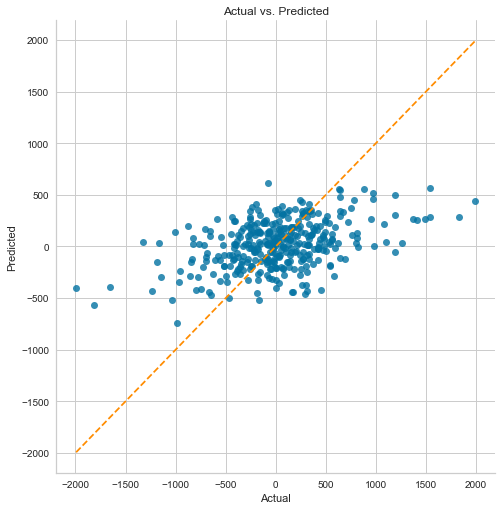

If non-linearity is apparent, consider adding a polynomial term

Assumption 2: The error terms are normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 7.381419986475575e-20
Residuals are not normally distributed


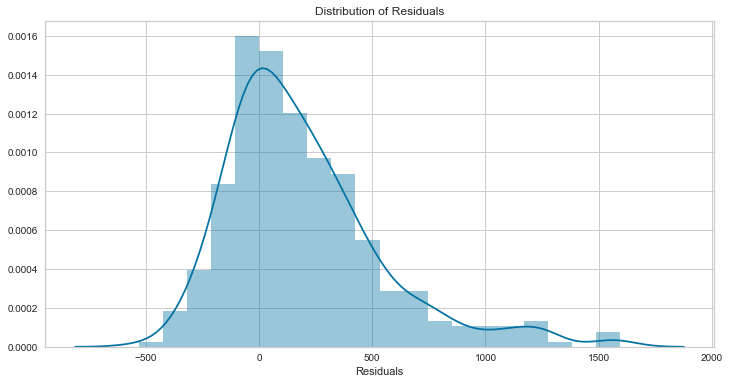


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables

Assumption 3: Little to no multicollinearity among predictors


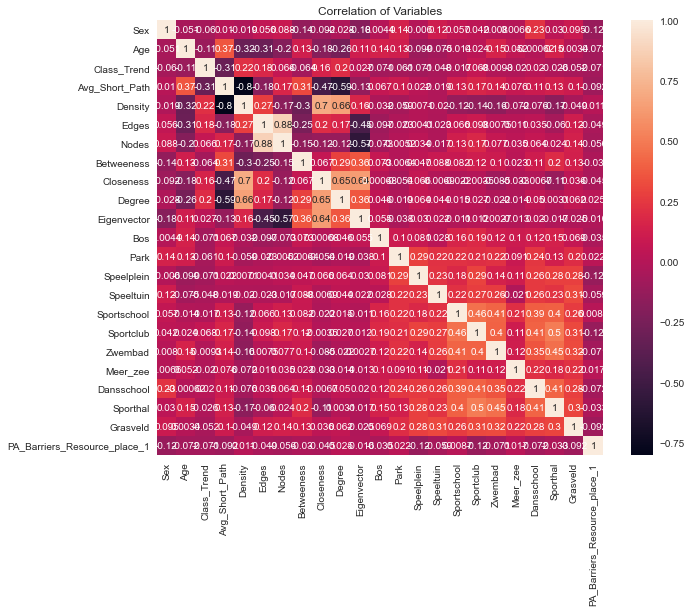

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Sex: 2.309535317608348
Age: 96.99243459505038
Class_Trend: 1.2025777854928321
Avg_Short_Path: 199.27620093178444
Density: 279.1201224869989
Edges: 55.239730408699764
Nodes: 215.34202950801188
Betweeness: 5.207464707876126
Closeness: 539.2711367925983
Degree: 85.06079083667859
Eigenvector: 140.02795999865532
Bos: 1.539447843073765
Park: 2.439480753635871
Speelplein: 3.4073355472802938
Speeltuin: 5.732762630850138
Sportschool: 2.306477182240117
Sportclub: 3.110913655040097
Zwembad: 2.9256556231911874
Meer_zee: 1.420743770625083
Dansschool: 2.2026546510724443
Sporthal: 3.333495556235033
Grasveld: 5.993835501620253
PA_Barriers_Resource_place_1: 2.918300300487983

8 cases of possible multicollinearity
5 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problemati

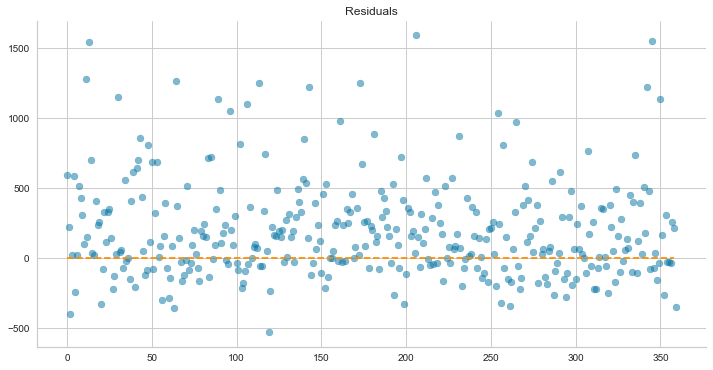

If heteroscedasticity is apparent, confidence intervals and predictions will be affected


In [16]:
#X = full_table_13.drop(columns = ['Sex', 'Age', 'Class_Trend', 'Edges', 'Betweeness', 'Degree', 'Trend', 'Overall_Trend','Child', 'School', 'Class', 'Closeness', 'Nodes', 'Density', 'Avg_Short_Path', 'Eigenvector'])
X = full_table_13.drop(columns = ['Trend', 'Overall_Trend','Child', 'School', 'Class'])
y = full_table_13['Trend']

model = LinearRegression()  
model.fit(X, y)
    
ipynb.fs.full.script.linear_regression_assumptions(X, y, X.columns)

,Sex,Age,Class_Trend,Avg_Short_Path,Density,Edges,Nodes,Betweeness,Closeness,Degree,Eigenvector,Bos,Park,Speelplein,Speeltuin,Sportschool,Sportclub,Zwembad,Meer_zee,Dansschool,Sporthal,Grasveld,PA_Barriers_Resource_place_1
0,1,11.0,61.752160,1.330065,0.669935,205,18,0.024125,0.772727,1.470588,0.238135,1,1,0,1,1,1,0,1,1,1,1,1.0
1,1,12.0,61.752160,1.330065,0.669935,205,18,0.017039,0.772727,1.294118,0.240811,0,1,0,1,0,1,1,0,1,0,1,1.0
2,0,11.0,61.752160,1.330065,0.669935,205,18,0.006038,0.708333,1.058824,0.195491,0,1,1,0,1,0,0,1,0,0,1,3.0
3,1,11.0,61.752160,1.330065,0.669935,205,18,0.021561,0.680000,1.529412,0.179114,0,1,0,1,0,1,0,1,0,0,1,1.0
4,1,12.0,61.752160,1.330065,0.669935,205,18,0.000460,0.680000,1.000000,0.179114,1,0,0,0,0,0,0,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0,10.0,232.689635,1.111111,0.888889,272,18,0.011512,0.944444,1.941176,0.247409,0,0,0,1,1,1,1,0,0,1,1,2.0
356,1,9.0,232.689635,1.111111,0.888889,272,18,0.014462,0.944444,1.941176,0.248110,0,1,1,1,1,1,1,0,1,1,1,1.0
357,1,9.0,232.689635,1.111111,0.888889,272,18,0.005054,1.000000,1.764706,0.262937,1,0,1,0,0,1,0,0,0,0,1,2.0
358,1,9.0,232.689635,1.111111,0.888889,272,18,0.016198,1.000000,2.000000,0.262937,0,1,1,0,0,0,0,0,1,0,1,1.0


C:\Users\Armin\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Armin\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Armin\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplo

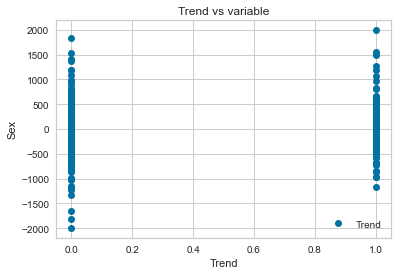

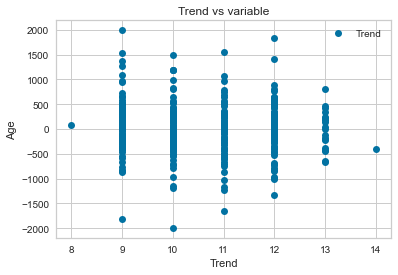

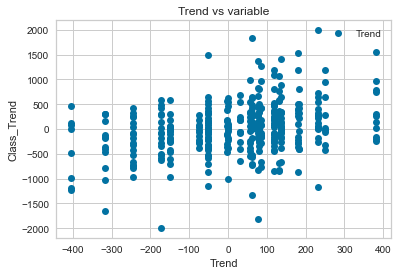

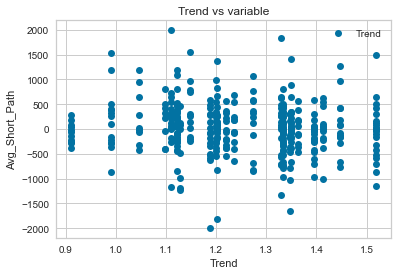

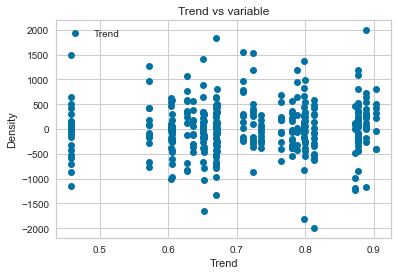

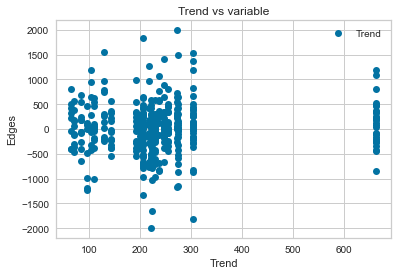

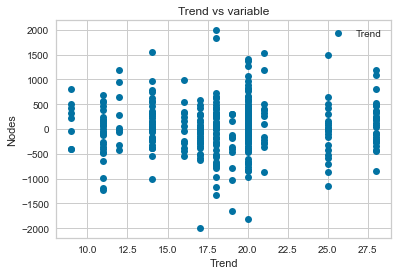

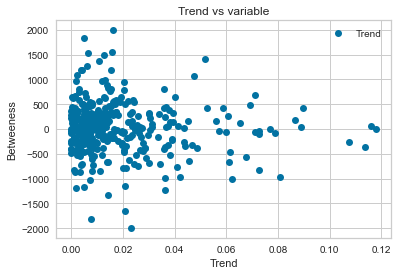

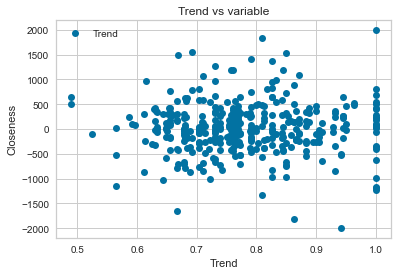

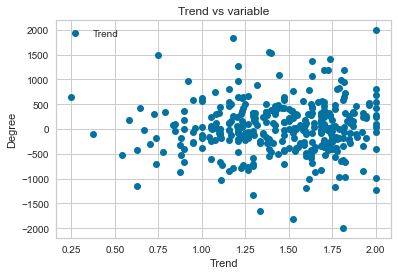

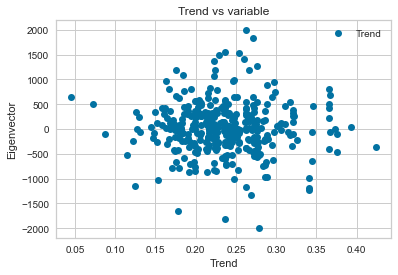

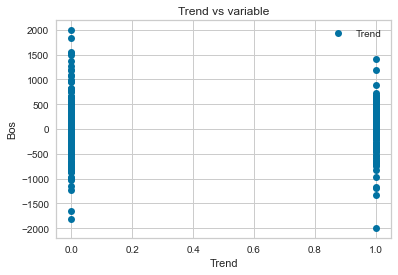

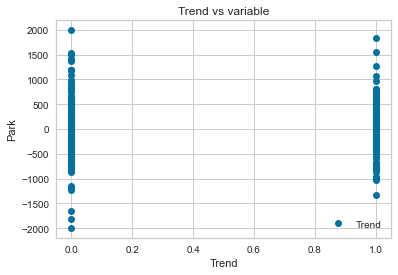

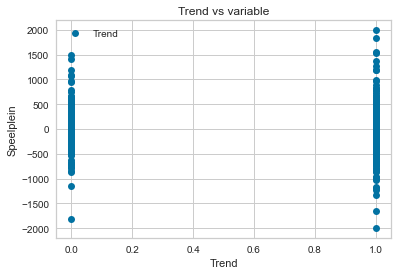

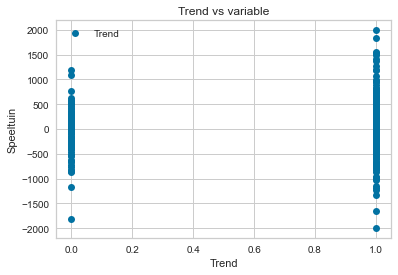

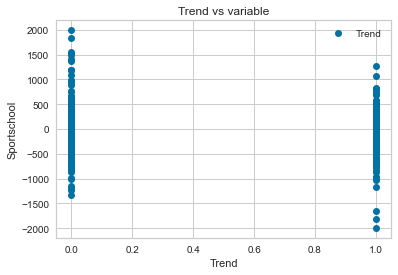

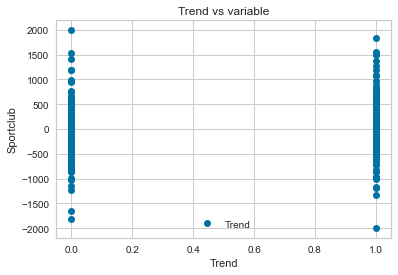

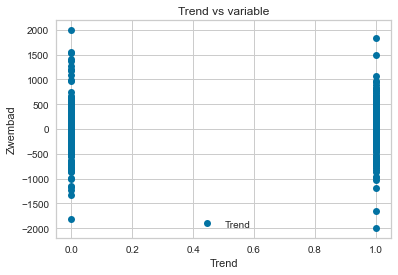

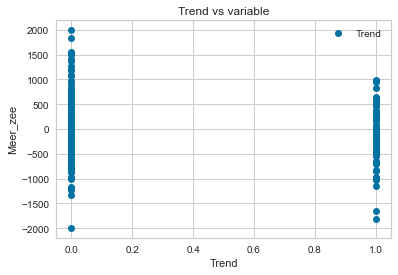

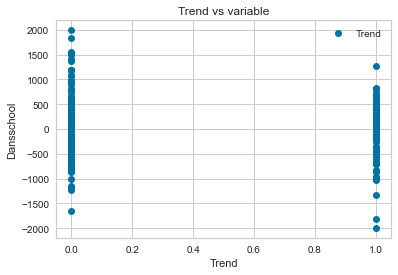

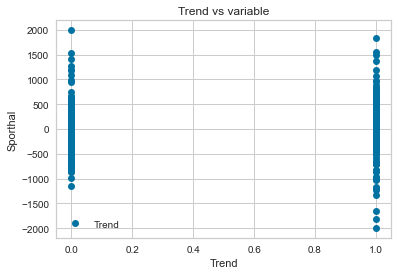

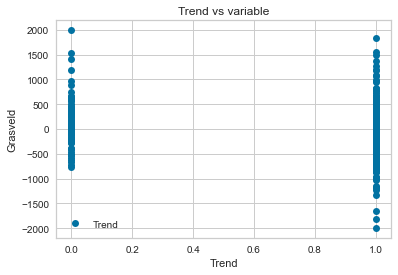

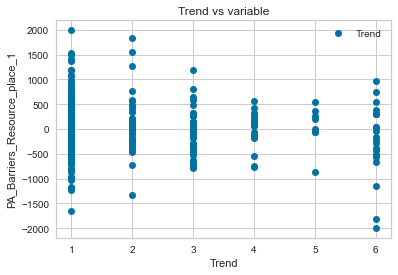

In [17]:
ipynb.fs.full.script.trend_correlation(X, y)

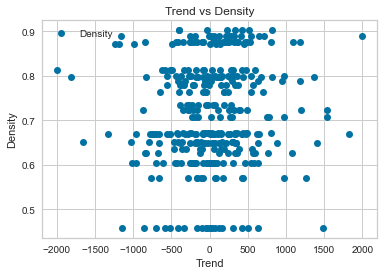

[-292.6192]
[[446.289]]


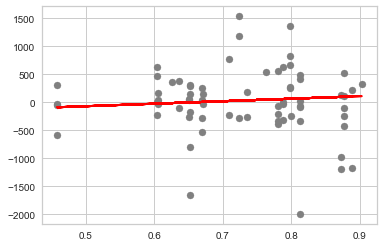

,Actual,Predicted
0,47.000000,6.365212
1,545.666667,48.183259
2,1370.666667,63.237504
3,-82.200000,69.990561
4,529.714286,98.769117
...,...,...
67,1537.300000,30.408979
68,150.000000,6.864159
69,30.857143,6.365212
70,-164.196429,-1.617942


In [18]:
# do linear regression on trend by using density as variable
temp = full_table_13
temp[['Trend','Density']]
temp.plot(x='Trend', y='Density', style='o')  
plt.title('Trend vs Density')  
plt.xlabel('Trend')  
plt.ylabel('Density')  
plt.show()

X = temp['Density'].values.reshape(-1,1)
y = temp['Trend'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
df

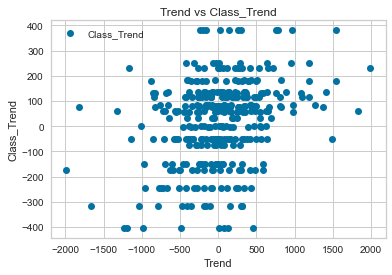

[-7.8024]
[[0.9996]]


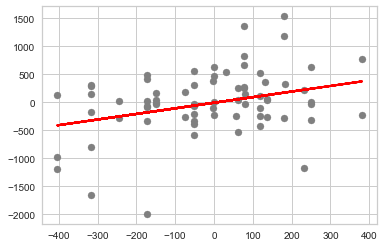

,Actual,Predicted
0,47.000000,53.922092
1,545.666667,24.415609
2,1370.666667,68.334531
3,-82.200000,-180.593191
4,529.714286,109.867970
...,...,...
67,1537.300000,172.176301
68,150.000000,72.642206
69,30.857143,-251.468720
70,-164.196429,-323.721442


In [19]:
# do linear regression on trend by using class trend as variable
temp[['Trend','Class_Trend']]
temp.plot(x='Trend', y='Class_Trend', style='o')  
plt.title('Trend vs Class_Trend')  
plt.xlabel('Trend')  
plt.ylabel('Class_Trend')  
plt.show()

X = temp['Class_Trend'].values.reshape(-1,1)
y = temp['Trend'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
df

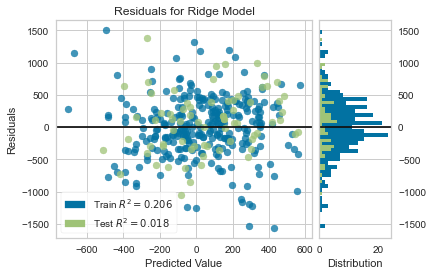

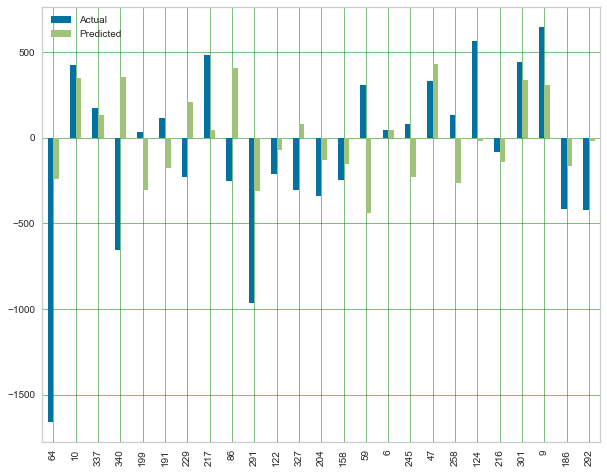

                                 OLS Regression Results                                
Dep. Variable:                  Trend   R-squared (uncentered):                   0.196
Model:                            OLS   Adj. R-squared (uncentered):              0.134
Method:                 Least Squares   F-statistic:                              3.134
Date:                Sat, 07 Nov 2020   Prob (F-statistic):                    1.03e-06
Time:                        16:19:47   Log-Likelihood:                         -2724.1
No. Observations:                 360   AIC:                                      5500.
Df Residuals:                     334   BIC:                                      5601.
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

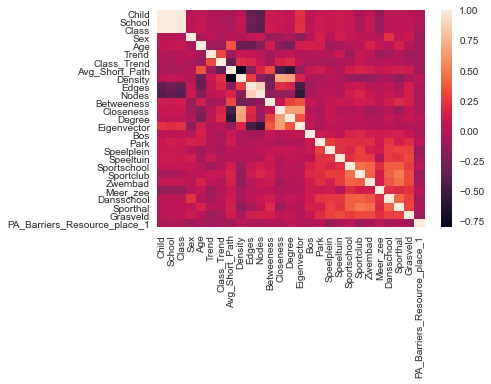

In [20]:
# linear regression on all variables. First is residual plot, second is the actual data vs predicted, third is the OLS data
# and at last is the heatmap of all variables to check for multicolinearity
X = full_table_13.drop(columns = ['Trend', 'Overall_Trend'])
y = full_table_13['Trend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

corr = full_table_13.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
#check for multicollinearity in the data
#results is that obviously there is multicollinearity among Child, Class and school. Same applies with MVPA, Weekend MVPA etc but that is trivial too

In [21]:
# creating 2 participant pools of increasing participants and one of decreasing participants
display(full_table_13.groupby('Overall_Trend').mean())
#observations
#increasing is mostly male, high class trend, lower betweenness, more forests nearby (bos), more playgrounds (speeltuin), lowest barriers for area
#decreasing has for almost almost facilities the lowest number, 

,Child,School,Class,Sex,Age,Trend,Class_Trend,Avg_Short_Path,Density,Edges,Nodes,Betweeness,Closeness,Degree,Eigenvector,Bos,Park,Speelplein,Speeltuin,Sportschool,Sportclub,Zwembad,Meer_zee,Dansschool,Sporthal,Grasveld,PA_Barriers_Resource_place_1
Overall_Trend,,,,,,,,,,,,,,,,,,,,,,,,,,,
decreasing,1748.625000,28.875000,82.625000,0.125000,10.625000,-904.985218,41.295919,1.310255,0.671411,234.375000,19.375000,0.012910,0.751923,1.262294,0.229055,0.125000,0.125000,0.375000,0.250000,0.250000,0.125000,0.250000,0.625000,0.250000,0.375000,0.875000,3.000000
increasing,2054.105263,31.473684,95.157895,0.421053,10.631579,855.572849,114.913391,1.238815,0.720500,269.368421,19.315789,0.014557,0.762026,1.461845,0.212436,0.315789,0.315789,0.368421,0.789474,0.210526,0.421053,0.526316,0.052632,0.157895,0.421053,0.578947,1.736842
no trend,2250.951952,33.384384,101.909910,0.483483,10.582583,-2.511990,17.014378,1.252671,0.713912,241.447447,18.402402,0.018515,0.783648,1.455069,0.236184,0.288288,0.489489,0.615616,0.789790,0.345345,0.432432,0.474474,0.195195,0.303303,0.471471,0.777778,1.846847


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

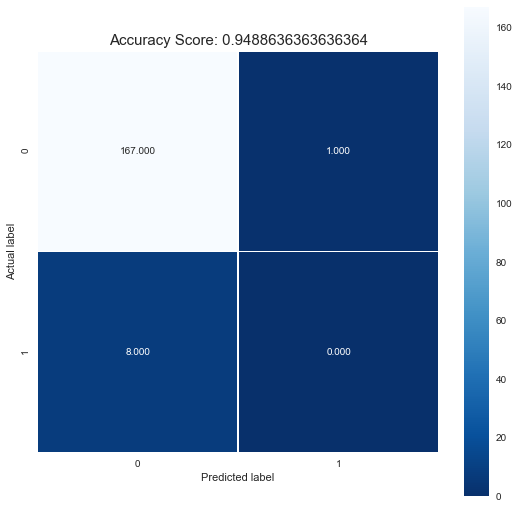

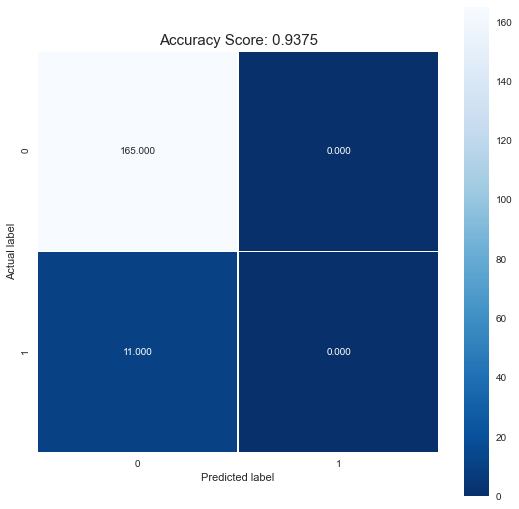

In [22]:
X = full_table_13.drop(columns = ['Trend'])
X = X[X['Overall_Trend'] != 'decreasing']
X = X.drop(['Overall_Trend', 'Child', 'School', 'Class'], axis = 1)

y = full_table_13['Overall_Trend']
y = y[y != 'decreasing']
y = y.replace(['increasing'], 1)
y = y.replace(['no trend'], 0)

lr = LogisticRegression(solver='lbfgs', max_iter=5000)

kf = KFold(n_splits=2, shuffle = True)
kf.split(X) 

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model = lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    cm = metrics.confusion_matrix(y_test, predictions)
    score = lr.score(X_test, y_test)
    # Append to accuracy_model the accuracy of the model
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    display(predictions)



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

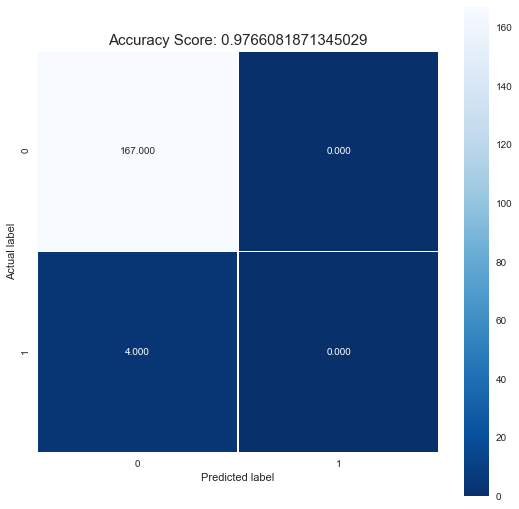

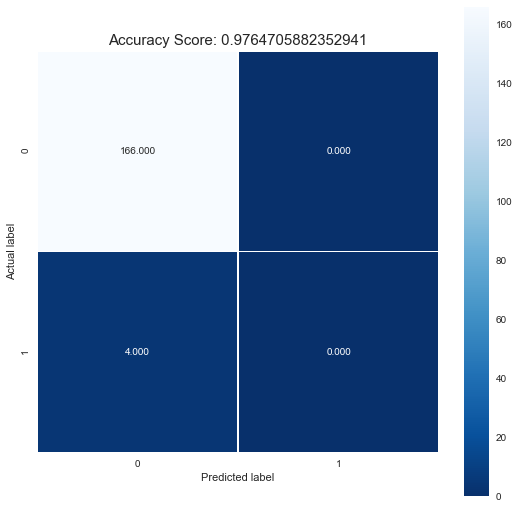

In [23]:
X = full_table_13.drop(columns = ['Trend'])
X = X[X['Overall_Trend'] != 'increasing']
X = X.drop(['Overall_Trend', 'Child', 'School', 'Class', 'Zwembad', 'Meer_zee', 'Dansschool'], axis = 1)

y = full_table_13['Overall_Trend']
y = y[y != 'increasing']
y = y.replace(['decreasing'], 1)
y = y.replace(['no trend'], 0)

lr = LogisticRegression(solver='lbfgs', max_iter=5000)

kf = KFold(n_splits=2, shuffle = True)
kf.split(X) 

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model = lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    cm = metrics.confusion_matrix(y_test, predictions)
    score = lr.score(X_test, y_test)
    # Append to accuracy_model the accuracy of the model
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    display(predictions)



array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,
        0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

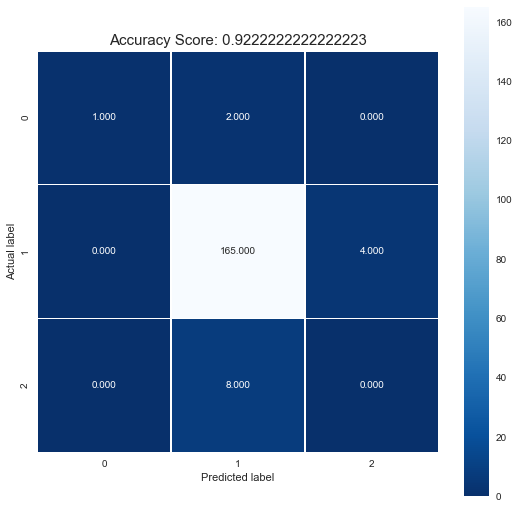

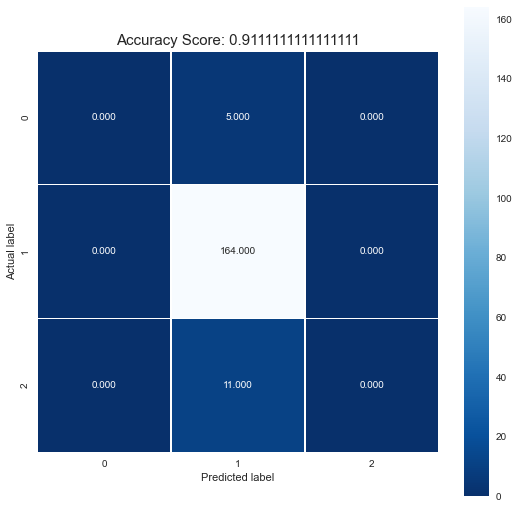

In [24]:
X = full_table_13.drop(columns = ['Trend'])
X = X.drop(['Overall_Trend', 'Child', 'School', 'Class', 'Zwembad', 'Meer_zee', 'Dansschool'], axis = 1)

y = full_table_13['Overall_Trend']
y = y.replace(['increasing'], 1)
y = y.replace(['decreasing'], -1)
y = y.replace(['no trend'], 0)

lr = LogisticRegression(solver='lbfgs', max_iter=5000)

kf = KFold(n_splits=2, shuffle = True)
kf.split(X) 

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model = lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    cm = metrics.confusion_matrix(y_test, predictions)
    score = lr.score(X_test, y_test)
    # Append to accuracy_model the accuracy of the model
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    display(predictions)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

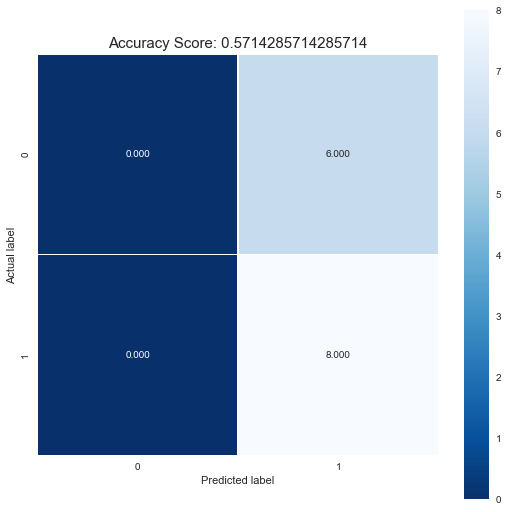

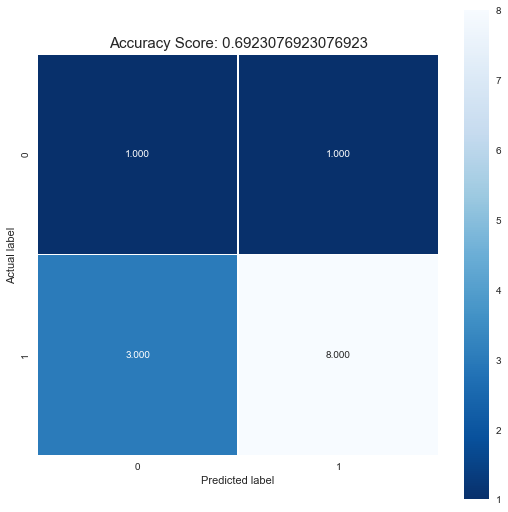

In [25]:
X = full_table_13.drop(columns = ['Trend'])
X = X[X['Overall_Trend'] != 'no trend']
X = X.drop(['Overall_Trend', 'Child', 'School', 'Class', 'Zwembad', 'Meer_zee', 'Dansschool'], axis = 1)

y = full_table_13['Overall_Trend']
y = y[y != 'no trend']
y = y.replace(['increasing'], 1)
y = y.replace(['decreasing'], 0)

lr = LogisticRegression(solver='lbfgs', max_iter=5000)

kf = KFold(n_splits=2, shuffle = True)
kf.split(X) 

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model = lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    cm = metrics.confusion_matrix(y_test, predictions)
    score = lr.score(X_test, y_test)
    # Append to accuracy_model the accuracy of the model
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    display(predictions)

In [26]:
X = full_table_13.drop(columns = ['Trend'])
X = X[['Zwembad','Meer_zee','Dansschool','Nodes','Density', 'Grasveld', 'Bos', 'Park', 'Betweeness', 'Closeness']]
all_combinations = []

for r in range(len(X) + 1):
    combinations_object = itertools.combinations(X, r)
    combinations_list = list(combinations_object)
    all_combinations += combinations_list

all_combinations.pop(0)
all_combinations = list(all_combinations)
all_combinations = [list(item) for item in all_combinations]

In [27]:
df_results = pd.DataFrame (columns = ['Combination','Score'])
for combination in all_combinations:
    x = X[combination]
    y = full_table_13['Overall_Trend']
    y = y.replace(['no trend'], 0)
    y = y.replace(['increasing'], 1)
    y = y.replace(['decreasing'], -1) 
    
    #X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    model = lr.fit(X, y)
    score = lr.score(X, y)

    df_results = df_results.append({'Combination': combination, 'Score': score}, ignore_index=True)
display(df_results.max())

Combination    [Zwembad, Park, Closeness]
Score                               0.925
dtype: object